# Nesse notebook, temos algumas perguntas sobre nosso dataset que serão resolvidas mediante uma análise exploratória de dados simples.
#### Pergunta 1 : Qual o intervalo de tempo estamos analisando?




In [1]:
# importando a biblioteca pandas
import pandas as pd

In [2]:
# Chamando nossa base de dados em csv mudando o parâmetro de separador para ';' para não gerar o erro 
df = pd.read_csv('/home/cicero_hitzschky/Desktop/Dio/DataScientist/AnaliseDadosPandas/projeto_pandas/datasets/Gapminder.csv', sep =';')

# Lendo as 5 primeiras linhas
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# traduzindo os títulos das colunas para melhor apresentação dos gŕaficos futuros
df  = df.rename(columns={
    'country':'pais',
    'continent':'continente',
    'year':'ano',
    'lifeExp':'expectativa de vida',
    'pop':'populacao total',
    'gdpPercap':'pib'
    })
df.head()

,pais,continente,ano,expectativa de vida,populacao total,pib
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# Análise estatística prévia do dataset
df.describe()


,ano,expectativa de vida,populacao total,pib
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900



A tabela acima retorna o valor máximo e o mínimo em todas as colunas. Assim, concluímos que:
#### <font color="red"> RESPOSTA: </font> Nossos dados começam a serem analisados em 1950 e vão até 2007
---

#### Pergunta 2 : Quais são os continentes analisados?


In [5]:
# Verificando os continentes
df['continente'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

#### <font color="red"> RESPOSTA: </font> Os países que estão sendo analisados são: 'Asia', 'Europe', 'Africa', 'Americas','FSU' e  'Oceania'
---

#### Pergunta 3 : Qual continente possui mais países?


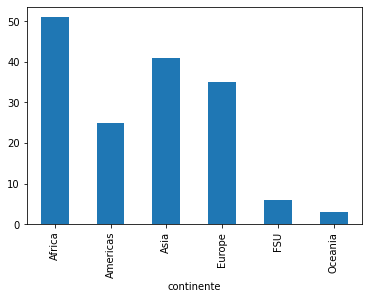

In [6]:
# Agrupando continentes e paises
df.groupby('continente')['pais'].nunique().plot(kind='bar');

#### <font color="red"> RESPOSTA: </font> A África possui mais paises
---

#### Pergunta 4 : Qual a expectativa de vida média em cada continente no intervalo de tmepo analisado? E 1950? E 2007?


In [7]:
# Agrupando por continente e expectativa de vida pondo a média
vida_media_total = df.groupby('continente')['expectativa de vida'].mean()

# Criando uma tabela com as informações 

display(df_vida_media_total)
#['Continente','Exp Média de Vida']

NameError: name 'df_vida_media_total' is not defined

In [ ]:
# Excluindo a linha oceania que aparece como coluna

df_vida_media_total = df_vida_media_total.drop(columns='Oceania')

,expectativa de vida
continente,
Africa,48.518682
Americas,65.789711
Asia,62.242752
Europe,72.721644
FSU,68.800279
Oceania,70.396622


,pais,continente,ano,expectativa de vida,populacao total,pib
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
3263,Vietnam,Asia,2007,74.249,85262356,2441.576404
3275,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
3287,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
3299,Zambia,Africa,2007,42.384,11746035,1271.211593


<AxesSubplot: xlabel='continente'>

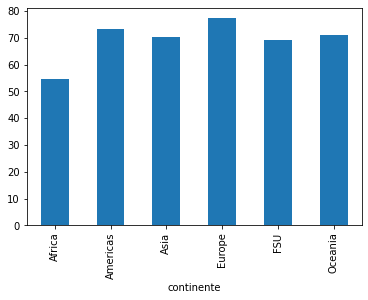

In [ ]:
# Analisando a expectativa de vida em cada continente no ano de 1950

ano_1950 = df.loc[df['ano'] == 2007]
display(ano_1950)

ano_1950_media = ano_1950.groupby('continente')['expectativa de vida'].mean()
display(ano_1950_media.plot(kind='bar'));

#### Pergunta 5 : Qual o pib médio em cada continente no ano de 2004?

In [14]:
df.groupby('continente')['pib'].mean()

continente
Africa       2138.088351
Americas     8979.564475
Asia        10070.908182
Europe      16551.177664
FSU          7903.069822
Oceania     13078.961304
Name: pib, dtype: float64